<a href="https://colab.research.google.com/github/gquadros80/NODEJS-CODESPACES/blob/master/Solu%C3%A7%C3%B5es_com_Python_1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Instalando Pacotes
# Mercado financeiro B3
!pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Libs necessárias

# Pacotes analise de dados
import pandas as pd
import pandas_datareader.data as web
import numpy as np

# Analises gráficas
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Função para data
from datetime import datetime

# YFinance
import yfinance as yf
yf.pdr_override()

# Avisos
import warnings
warnings.filterwarnings('ignore')

# **API Yahoo Finance**
O yfinance oferece uma maneira segmentada e Pythonic de baixar dados de mercado do Yahoo!®finanças.

In [3]:
# Coletando dados
Dados = web.get_data_yahoo( 'PETR4.SA', period='1y')

# Shape
Dados.shape


[*********************100%***********************]  1 of 1 completed


(252, 6)

In [4]:
# Verificando dados

# Primeiros registros
Dados.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-10,32.299999,32.900002,31.940001,32.439999,18.958057,49534600
2022-02-11,32.770000,33.910000,32.630001,33.759998,19.729469,88013400
2022-02-14,33.860001,33.939999,32.820000,33.000000,19.285324,55687000
2022-02-15,32.660000,32.680000,31.889999,32.480000,18.981434,65689000
2022-02-16,32.830002,33.700001,32.770000,32.930000,19.244415,65811600


In [5]:
# Útimos registros
Dados.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-06,24.870001,25.870001,24.750000,25.780001,25.780001,82794500
2023-02-07,25.910000,26.139999,25.459999,25.620001,25.620001,55311800
2023-02-08,25.799999,26.150000,25.559999,26.049999,26.049999,48713100
2023-02-09,26.049999,26.320000,25.790001,25.930000,25.930000,38198300
2023-02-10,25.980000,26.790001,25.930000,26.719999,26.719999,54683100


In [6]:
# Estatistica
Dados.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,29.936190,30.476587,29.394960,29.951944,23.394864,8.192431e+07
std,3.663650,3.681757,3.621338,3.648793,3.532175,3.683580e+07
min,21.000000,22.110001,20.770000,21.469999,17.537958,2.876520e+07
25%,26.995000,27.545000,26.167500,26.930000,20.008965,5.612075e+07
50%,30.750000,31.339999,30.205000,30.605000,23.325000,7.285520e+07
75%,32.717501,33.507500,32.382501,32.967500,26.070860,9.630120e+07
max,37.650002,38.389999,36.849998,37.720001,33.003029,3.195016e+08


In [7]:
# Infromações
Dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2022-02-10 to 2023-02-10
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       252 non-null    float64
 1   High       252 non-null    float64
 2   Low        252 non-null    float64
 3   Close      252 non-null    float64
 4   Adj Close  252 non-null    float64
 5   Volume     252 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


# **Média Móvel**
Media Móvel

A média móvel é um indicador que faz parte da Análise Técnica de ações. Com ela, é possível identificar o equilíbrio dos preços no mercado, observando tendências de alta, neutra ou baixa. A representação gráfica das médias móveis é normalmente feita por uma linha, que se movimenta conforme os dados novos recebidos para o cálculo.

O que é a média móvel?

A média móvel é um indicador importante que suaviza os dados dos preços das ações para formar um indicador que segue a tendência.

E como fazer esse cálculo?
Basta utilizar a fórmula: MMA = Soma dos preços de fechamento ÷ Número de dias

Considere a média móvel aritmética de 5 dias e sua evolução ao longo de 3 dias, em que os preços diários de fechamento são:
11,12,13,14,15,16 e 17.

Primeiro dia da MMA de 5 dias: (11 + 12 + 13 + 14 + 15) ÷ 5 = 13
Segundo dia da MMA de 5 dias: (12 + 13 + 14 + 15 + 16) ÷ 5 = 14
Terceiro dia da MMA de 5 dias: (13 + 14 + 15 + 16 + 17) ÷ 5 = 15

In [8]:
# Média Simples
Lista = [11, 12, 13, 14, 15, 16, 17]

from statistics import mean as Media
print(f'Media: { Media(Lista) }')


Media: 14


In [9]:
# Periodo da média móvel

# for Loop in range(10):
  # print( Loop )
n = 5

for Intervalo in range(3):
  print(f'{Intervalo}ª Dia: { sum(Lista[Intervalo:n]) / 5}')

0ª Dia: 13.0
1ª Dia: 10.8
2ª Dia: 8.4


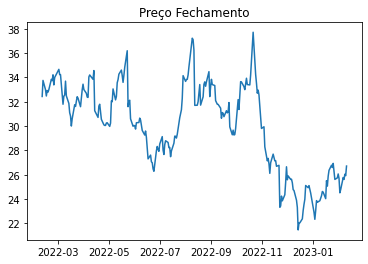

In [10]:
# Plot
plt.plot( Dados['Close'])
plt.title('Preço Fechamento');

# **Função rolling**

A função rolling() é uma função do pandas que permite calcular estatísticas em janelas deslizantes de dados. <br>
Ela é muito útil para calcular médias móveis, desvios padrão, somatórios, mínimos e máximos, entre outras estatísticas.

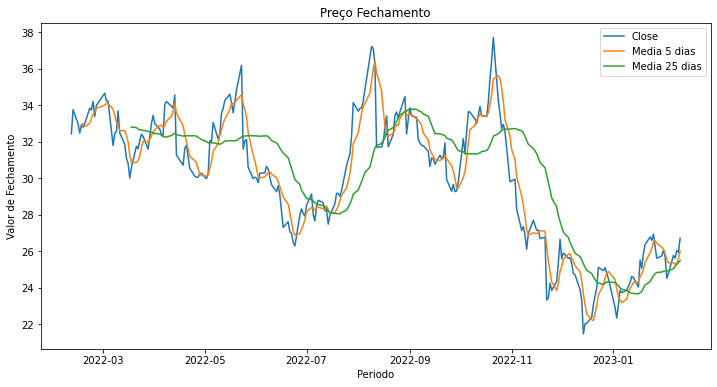

In [11]:
from pandas.core import window
Periodo = 5
Dados['Close'].rolling( window=Periodo ).mean()

plt.figure( figsize=(12,6) )
plt.plot( Dados['Close'])
plt.plot( Dados['Close'].rolling( window=Periodo ).mean() )
plt.plot( Dados['Close'].rolling( window=Periodo + 20 ).mean() )
plt.title('Preço Fechamento');
plt.legend(['Close', 'Media 5 dias', 'Media 25 dias']);
plt.ylabel('Valor de Fechamento')
plt.xlabel('Periodo');

# **Potly**

O PLOTLY é uma biblioteca Python de plotagem interativa e de código aberto que oferece suporte a mais de 40 tipos de gráficos exclusivos, abrangendo uma ampla variedade de casos de uso estatísticos, financeiros, geográficos, científicos e tridimensionais.

plotly.express (px) é uma maneira rápida e fácil de criar visualizações dinâmicas de dados.
plotly.graph_objects (go) é a API de nível inferior que concede mais controle sobre suas visualizações, mas é mais intensiva em código.

In [12]:
Periodo = 5
Dados['Media_Movel'] = Dados['Close'].rolling( window=Periodo ).mean()

Figure = px.line(
    Dados,
    y='Close',
    title='Fechamento'

)

Figure.show()

In [13]:
Figure_02 = go.Figure(
    data=go.Scatter(
        x=Dados.index,
        y=Dados['Close'],
        line=( dict(color='firebrick', width=3))

    )
)
Figure_02.update_layout(
    title='Analise de Fechamento',
    xaxis_title='Periodo',
    yaxis_title='Preço de fechamento'
)

Figure_02.show()

# **Candlestick Charts**

É um estilo de gráfico financeiro que descreve abertura, alta, baixa e fechamento para uma determinada xcoordenada (tempo mais provável). As caixas representam a dispersão entre os valores opene closee as linhas representam a dispersão entre os valores lowe high. Pontos de amostragem onde o valor de fechamento é maior (inferior) do que o valor de abertura são chamados de crescentes (decrescentes). Por padrão, as velas crescentes são desenhadas em verde, enquanto as decrescentes são desenhadas em vermelho.

In [14]:
# Grafico Candlestick
Grafico_Candlestick = go.Figure(
    data=[
        go.Candlestick(
            x=Dados.index,
            open=Dados['Open'],
            high=Dados['High'],
            low=Dados['Low'],
            close=Dados['Close'],
            increasing_line_color='cyan',
            decreasing_line_color='gray'
        )
    ]
    
)

Grafico_Candlestick.update_layout(
    xaxis_rangeslider_visible=False,
    title='Analise de Fechamento',
    xaxis_title='Periodo',
    yaxis_title='Preço de Fechamento'

)

Grafico_Candlestick.show()

# **Criando Relátorio**

In [32]:
# Criar a Figura
Figura = make_subplots(
    rows=2,
    cols=1,
    specs=[
        [{'type':'scatter'}],
        [{'type':'scatter'}]
    ],
    vertical_spacing= 0.075,
    shared_xaxes=True,
    subplot_titles=('Cotação', 'Fechamento')
)
# Layout e Dimensão

Figura.update_layout(
    width=1000,
    height=800,
    title_text='<b>Advanced Analytics</b> <br>Follow-up Petrobras'
)

# Adcionando um gráfico na 1ª Posição
Figura.add_trace(
    go.Candlestick(
        x=Dados.index,
        open=Dados['Open'],
        high=Dados['High'],
        low=Dados['Low'],
        close=Dados['Close'],
        increasing_line_color='red',
        decreasing_line_color='green'
    ),
    row=1, col=1
)

Figura.add_trace(
    go.Scatter(
        x=Dados.index,
        y=Dados['Media_Movel'],
        mode='lines',
        name='Média Móvel',
        line=dict(color='yellow')
    ),
    row=1, col=1
)

Figura.update_layout(
    xaxis_rangeslider_visible=False
)

# Adicionando um gráfico na 2ª Posição
Figura.add_trace(
    go.Scatter(
        x=Dados.index,
        y=Dados['Close'],
        mode='lines',
        name='Fechamento',
        line=dict(color='green')
    ),
    row=2, col=1
)

Figura.add_trace(
    go.Scatter(
        x=Dados.index,
        y=Dados['Media_Movel'],
        mode='lines',
        name='Média',
        line=dict(color='red')
    ),
    row=2, col=1
)

Figura.update_layout(
    legend=dict(
       orientation='h',
       yanchor='bottom',
       y=1.02,
       xanchor='right',
       x=1,
       font =dict( size=10)
    )
)

Figura.add_annotation(
    showarrow=False,
    text='<i>Analise feita no evento de Python</i> <br> Com: @Odemir Depieri Jr - <b>Data Viking</b>',
    font=dict( size=14),
    xref='x domain',
    x=1,
    yref='y domain',
    y=-1.4
)

Figura.add_annotation(
    showarrow=False,
    text='<b><i>By: @Gleidson Quadros</b></i>',
    font=dict( size=14),
    xref='x domain',
    x=0,
    yref='y domain',
    y=-1.4
)

Figura.show()

In [16]:
Dados.head()

,Open,High,Low,Close,Adj Close,Volume,Media_Movel
Date,,,,,,,
2022-02-10,32.299999,32.900002,31.940001,32.439999,18.958057,49534600,NaN
2022-02-11,32.770000,33.910000,32.630001,33.759998,19.729469,88013400,NaN
2022-02-14,33.860001,33.939999,32.820000,33.000000,19.285324,55687000,NaN
2022-02-15,32.660000,32.680000,31.889999,32.480000,18.981434,65689000,NaN
2022-02-16,32.830002,33.700001,32.770000,32.930000,19.244415,65811600,32.921999


# **Exportando PDF**

In [17]:
# !pip install -U kaleido

In [33]:
Figura.write_image('Report_Financeiro.pdf')